In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [3]:
handwritten_train_df=pd.read_csv('train.csv')
handwritten_test_df = pd.read_csv('test.csv')

In [15]:
handwritten_train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(handwritten_train_df.shape)
print(handwritten_test_df.shape)

(42000, 785)
(28000, 784)


In [17]:
training=np.array(handwritten_train_df,dtype='float32')
testing=np.array(handwritten_test_df,dtype='float32')

5.0

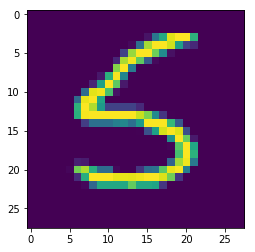

In [18]:
import random
rand=random.randint(0,41999)
plt.imshow(training[rand,1:].reshape(28,28))
lable = training[rand,0]
lable

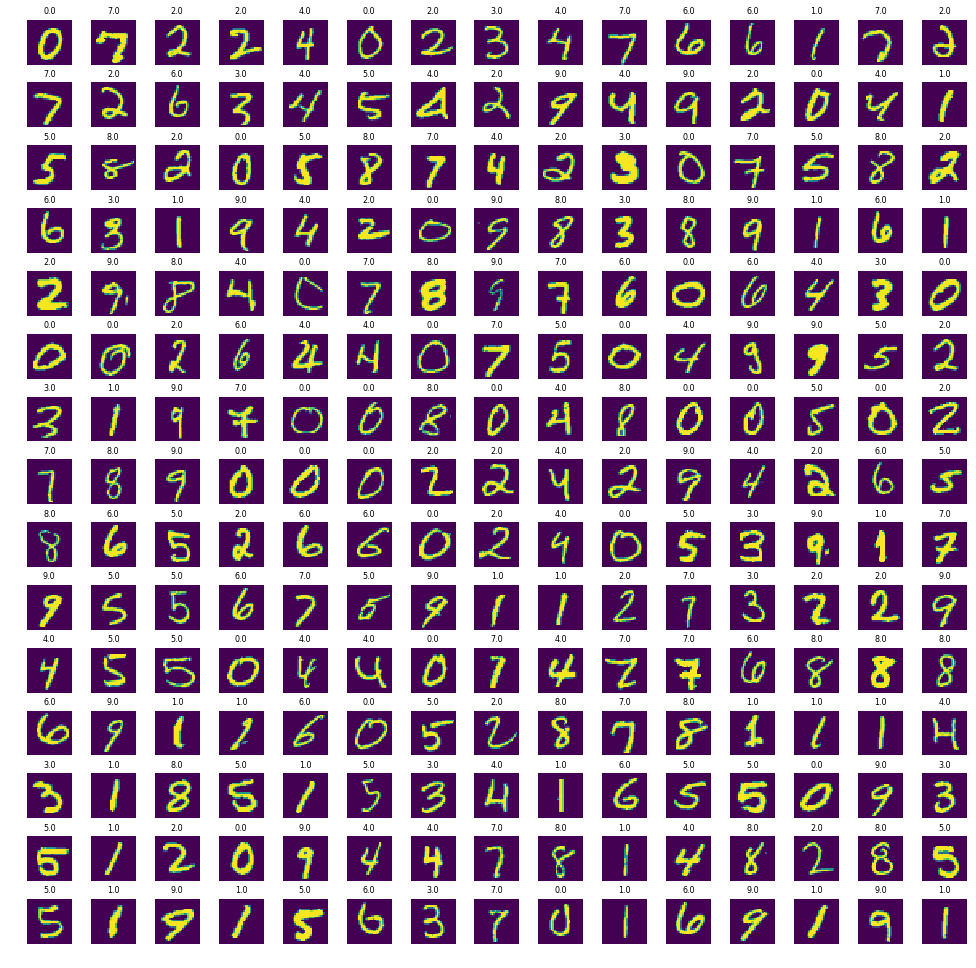

In [22]:
l_grid =15
w_grid =15
fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))
axes = axes.ravel()
n_training= len(training)
for i in np.arange(0,w_grid*l_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    


In [23]:
X_train = training[:,1:]/255

In [24]:
y_train = training[:,0]

In [37]:
X_test = testing[:,:]/255

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state =10000)

In [28]:
X_train.shape

(33600, 784)

In [29]:
X_validate.shape[0]

8400

In [32]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))


In [33]:

X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [38]:
X_test.shape

(28000, 784)

In [40]:
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [41]:
import keras

Using TensorFlow backend.


In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers imporcnn_model.add(MaxPooling2D(pool_size =(2,2)))t Adam
from keras.callbacks import TensorBoard

In [43]:
cnn_model = Sequential()

In [44]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation ='relu'))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [45]:
cnn_model.add(MaxPooling2D(pool_size =(2,2)))

In [46]:
cnn_model.add(Flatten())

In [47]:
cnn_model.add(Dense(output_dim =32,activation ='relu'))
cnn_model.add(Dense(output_dim =10,activation ='sigmoid'))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [48]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer =Adam(lr=0.001),metrics=['accuracy'])

In [49]:
epochs = 50

In [50]:
cnn_model.fit(X_train,y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose=1,validation_data=(X_validate,y_validate))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 7s 204us/step - loss: 0.9425 - acc: 0.7471 - val_loss: 0.3202 - val_acc: 0.9063
Epoch 2/50
33600/33600 [==============================] - 5s 157us/step - loss: 0.2681 - acc: 0.9235 - val_loss: 0.2336 - val_acc: 0.9358
Epoch 3/50
33600/33600 [==============================] - 5s 153us/step - loss: 0.1986 - acc: 0.9436 - val_loss: 0.1873 - val_acc: 0.9488
Epoch 4/50
33600/33600 [==============================] - 5s 157us/step - loss: 0.1561 - acc: 0.9557 - val_loss: 0.1606 - val_acc: 0.9580
Epoch 5/50
33600/33600 [==============================] - 5s 153us/step - loss: 0.1290 - acc: 0.9638 - val_loss: 0.1433 - val_acc: 0.9592
Epoch 6/50
33600/33600 [==============================] - 5s 154us/step - loss: 0.1095 - acc: 0.9694 - val_loss: 0.1280 - val_acc: 0.9650
Epoch 7/50
33600/33600 [==============================] - 5s 153us/step - loss: 0.0939 - acc: 0.9738 - val_loss: 0.1146 - v

In [62]:
predicted_classes= cnn_model.predict_classes(X_test)

In [63]:
predicted_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

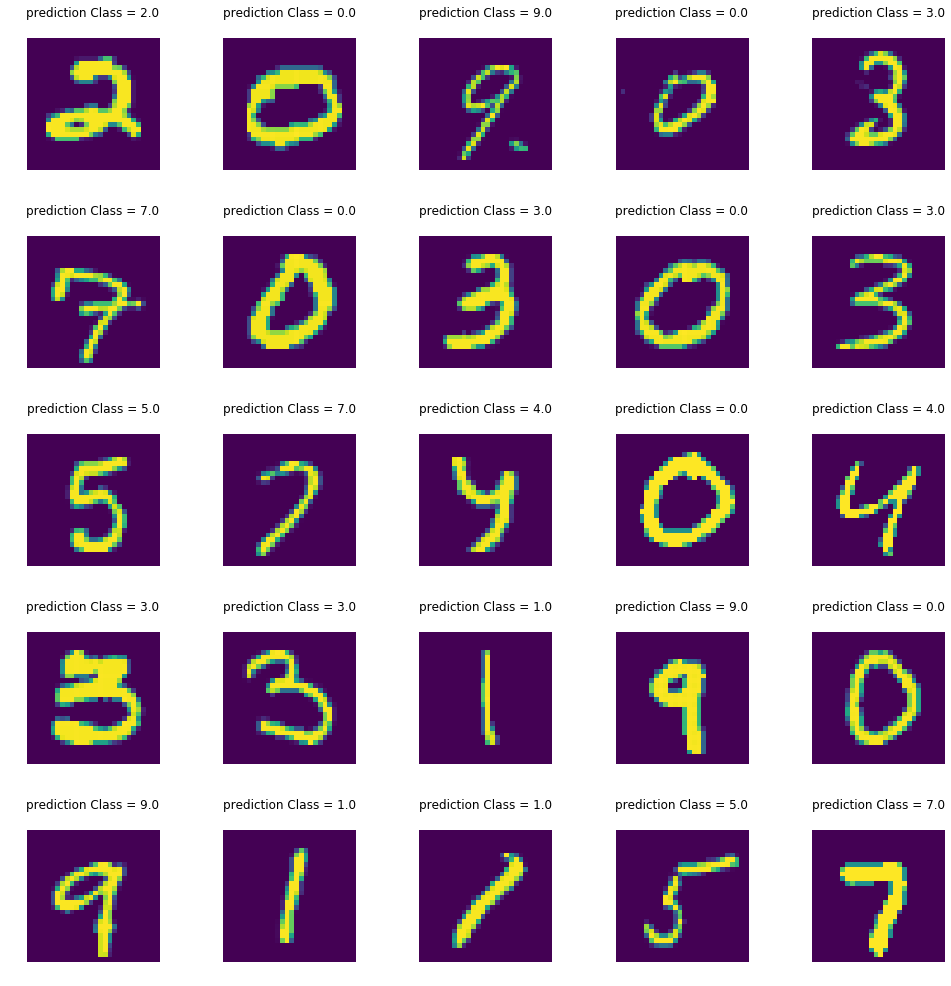

In [71]:
l=5
w=5

fig,axes = plt.subplots(l,w,figsize=(17,17))
axes = axes.ravel()

for i in np.arange(0,w*l):
    
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("prediction Class = {:0.1f}\n ".format(predicted_classes[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)  
